# The Stags - Health Stats Part 5

###### Data Source : 2015 US Department of Labour 

##### Research Questions to be answered
1. Is there a significant effect on drinking beverages other than water on BMI?
2. Is there a significant difference in BMI between diet soda consumers and regular soda consumers?
3. Is there a significant difference in the BMI of diet soda consumers versus global consumers minus diet soda, and regular soda consumers versus global consumers minus regular soda? 
4. Is there a significant effect on BMI for people who excercise vs people who dont?
5. Is there a significant effect on BMI for people with excellent health condition vs others
6. Is there a correlation between BMI and time spent eating? 
7. Is there a correlation between high BMI and Households whose income is high?


###### Key columns in Dataset

1. Body Mass Index (BMI)
2. Diet, Regular, or Both Soda (EUDIETSODA)
3. Cola Beverages (EUSODA)
4. Household Income (EEINCOME1)
5. Total amount of time spent in secondary eating (in minutes) (ERTPREAT)
6. Excercise (EUEXCERCISE)
7. Health condition (EUGENHTH)

In [1]:
# Package install
%matplotlib inline 
# Import modules!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data import/loading!
source_data = pd.read_csv('ehresp_2015.csv')

In [2]:
#Create new DataFrame "Results" and add the key columns to dataset

results = pd.DataFrame(source_data['ERBMI'])
results['EUHGT'] = source_data['EUHGT'] 
results['EUWGT'] = source_data['EUWGT']
results['EUDIETSODA'] = source_data['EUDIETSODA']
results['EUSODA'] = source_data['EUSODA']
results['EEINCOME1'] = source_data['EEINCOME1'] 
results['ERTPREAT'] = source_data['ERTPREAT'] #Total amount of time spent in primary eating and drinking (in minutes)
results['EUEXERCISE'] = source_data['EUEXERCISE']
results['EUGENHTH'] = source_data['EUGENHTH']
#print(results)
results_clean = (results[(results.EUWGT > 0) & (results.EUHGT > 0) & (results.ERBMI > 0)])
results = results_clean

In [3]:
#height is in inches multiply by 0.0254 for meters
height_test = (results.EUHGT * 0.0254)

# weight is in pounds  multiply by 0.453592
weight_test = (results.EUWGT * 0.45359237000000013)

#bmi formula 'BMI is your weight (in kilograms) over your height squared meters
bmi_test = (weight_test / (height_test * height_test))


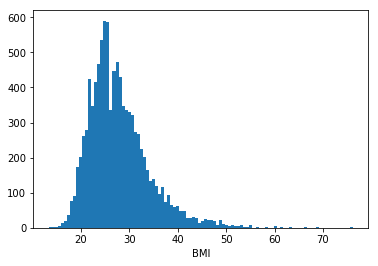

In [4]:
#BMI distribution
plt.hist(results.ERBMI, bins=100)
plt.xlabel('BMI')
plt.show()

In [5]:
#Diet, Regular, or Both Soda (EUDIETSODA)
soda_diet = (results[(results.EUDIETSODA == 1)])
#print(soda_diet.describe())
soda_reg = (results[(results.EUDIETSODA == 2)])
#print(soda_reg.describe())
soda_both = (results[(results.EUDIETSODA == 3)])
#print(soda_both.describe())

In [6]:
#Is there a significant effect on BMI for people who excercise vs people who dont?
#Excercise (EUEXCERCISE)
exer_yes = (results[(results.EUEXERCISE == 1)])
#print(exer_yes.describe())
exer_no = (results[(results.EUEXERCISE == 2)])
#print(exer_no.describe())

In [7]:
#Is there a significant effect on BMI for people with excellent health condition vs others
#Health condition (EUGENHTH)
health_excel = (results[(results.EUGENHTH == 1)])
#print(health_excel.describe())
health_not_excel = (results[(results.EUGENHTH != 1)])
#print(health_not_excel.describe())

In [9]:
#Is there a correlation between high BMI and Households whose income is high?
#Household Income (EEINCOME1)
income_high = (results[(results.EEINCOME1 == 1)])
print(income_high.describe())
income_not_high = (results[(results.EEINCOME1 != 1)])
print(income_not_high.describe())

             ERBMI        EUHGT        EUWGT   EUDIETSODA       EUSODA  \
count  6467.000000  6467.000000  6467.000000  6467.000000  6467.000000   
mean     27.376001    67.210453   176.804701    -0.382248     0.823257   
std       5.805961     4.042738    43.956996     1.142160     1.292689   
min      13.300000    56.000000    98.000000    -2.000000    -2.000000   
25%      23.400000    64.000000   145.000000    -1.000000    -1.000000   
50%      26.400000    67.000000   170.000000    -1.000000     1.000000   
75%      30.300000    70.000000   200.000000    -1.000000     2.000000   
max      63.300000    77.000000   340.000000     3.000000     2.000000   

       EEINCOME1     ERTPREAT   EUEXERCISE     EUGENHTH  
count     6467.0  6467.000000  6467.000000  6467.000000  
mean         1.0    68.775012     1.311737     2.282666  
std          0.0    50.530642     0.467228     0.969476  
min          1.0     0.000000    -2.000000    -2.000000  
25%          1.0    30.000000     1.000000 